CustomerId              int64
Surname                object
CreditScore             int64
Nationality            object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited or Retained      int64
dtype: object
Average Salary of Exited/Retained Custeroms is: 100090.2398809998
Number of Test Samples is: (2000,)
[[-1.11833347 -0.34588261  1.00886381 -0.84839766]
 [ 0.17644758 -1.72803092 -1.21900347  0.67279499]
 [ 1.20191418  0.34519154  0.27717518 -0.37302496]
 [-0.22752411  0.34519154 -0.09930325 -0.75332312]
 [ 1.26406367  1.03626569  1.25230579  0.29249682]
 [-1.37728968 -1.38249384  0.75893614 -1.13362128]
 [ 1.60588587 -1.38249384  0.07541874  2.66936034]
 [-2.2163078   0.34519154  1.06827827 -0.37302496]
 [-0.19644936 -0.69141969  0.82690942 -1.51391945]
 [-0.90081025  0.34519154 -1.5934582

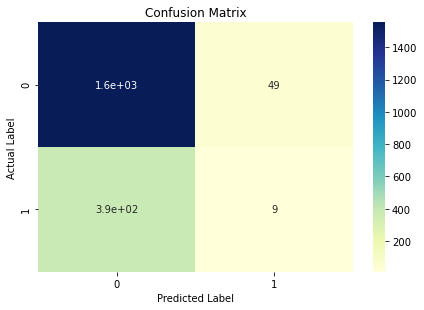

In [1]:
# -*- coding: utf-8 -*-
"""

@author: Roelof
"""
                                        #Churn Analysis - Bank Customers
                                        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv("Churn_Modelling.csv")

                                    #Data Wrangling
                                    
df=df1.dropna()
df.rename(columns={"Geography":"Nationality","Exited":"Exited or Retained"},inplace=True)
df.drop(columns="RowNumber",inplace=True)

#Datatype of features
datatypes=df.dtypes
print(datatypes)

#Number of Nationalities with the bank
Nationality_count=df["Nationality"].value_counts()

#Average Salary of all Customers - exited or retained
Average_Salary=df["EstimatedSalary"].mean()
print("Average Salary of Exited/Retained Custeroms is:",Average_Salary)

#Number of Active Customers that have closed account(1) or retained (0)
active_customer_exit_retain=df.groupby("Exited or Retained")["IsActiveMember"].count()

#Number of Customers that have closed account(1) or retained(0)
Num_customer_churn=df.groupby("Exited or Retained")["CustomerId"].count()

                                
#Mean Salary of customers that have closed account(1) or retained (0)
Mean_salary_by_churn=df.groupby("Exited or Retained")["EstimatedSalary"].mean()

#Find top 500 Customers with highest estimated salaries
Top_salary=df.nlargest(500,"EstimatedSalary",keep="first")

#Select rows where Credit Score >= 800
Excellent_credit=df[(df["CreditScore"]>=800)]

#Look at Specific Customer data
Customer1=df.loc[df["Surname"]=="Belbin"]

#Look at customers with last name "Gordan" and filter out specific data
Customer2=df.loc[df["Surname"]=="Gordon",["CustomerId","EstimatedSalary","Nationality","Exited or Retained"]]

#Look at Number of retained customers with filtered out data
Churn_retain=df.loc[df["Exited or Retained"]==0,["Tenure","EstimatedSalary","CreditScore","Age"]]




                                    # Machine Learning - Classification(Logistic Regression)
                                    # Predict Churn Analysis 
                                    
                                    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


X=df[["CreditScore","Tenure","EstimatedSalary","Age"]]
y=df["Exited or Retained"]


#Split the Dataset - Train/Test/Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=4)
Num_test_samples=y_test.shape
print("Number of Test Samples is:",Num_test_samples)

#Feature Scaling because feature values have very different ranges
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)
print(X_train[0:10,:])  # See the feature values scaled

#Train the model - Logistic Regression
classifierL=LogisticRegression()
classifierL.fit(X_train,y_train)
#4. Predictions on the testing data
ypred=classifierL.predict(X_test)

#Test Performance of model (Confusion Matrix)
from sklearn.metrics import confusion_matrix
cml=confusion_matrix(y_test, ypred)
print("Confusion Matrix:", cml)

    
#Plot confusion matrix - seaborn
sns.heatmap(cml, annot=True, cmap="YlGnBu")
plt.tight_layout()
plt.title("Confusion Matrix",fontsize=12)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

#Accuracy Score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
print("Accuracy is:", accuracy_score(y_test, ypred))
print("Precision is:", precision_score(y_test, ypred))
print("Recall is:", recall_score(y_test,ypred)) 
print(classification_report(y_test,ypred))
